# ARIMA load and generation forecast

In [1]:
project_home = %env PROJECT_HOME
%cd $project_home

F:\ai_voucher\MeritOrderPrediction


In [2]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px
from math import sqrt

In [14]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
#https://machinelearningmastery.com/make-sample-forecasts-arima-python/
# http://www.reiter1.com/Glossar/ARIMA.htm

# Load forecasting

### Read in load data

In [3]:
data = pd.read_csv("./data/load_data.csv",
                   header=[0],
                   index_col=0,
                   parse_dates=True
                  )

data.index = pd.to_datetime(data.index,
                            utc=True
                           ).tz_convert(tz="Europe/Berlin")

In [4]:
data = data["2020-01-01":"2020-12-31"].resample("1H").mean() # resample data to 1 hour resolution

### make auto-correlation 

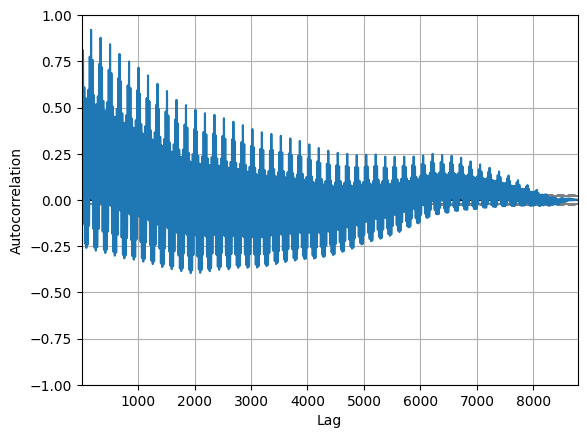

In [5]:
autocorrelation_plot(data)
plt.show()

# Predition model

### define train and test dataset

In [6]:
train = data["2020-01-01":"2020-01-07"]
test = data["2020-01-08":"2020-01-14"]

### make predictions

In [7]:
predictions = pd.DataFrame()
MAPE = []
MAE = []
RMSE = []

# iterate through the test dataset,day by day
for i in range(0, len(test),24):
    start = test.index[i]
    end = test.index[i+23]
    
    # train the model order=(AR,I,MA)
    model = ARIMA(train, order=(24,1,24))
    
    # fit the model
    model_fit = model.fit()
    
    # make prediction from start to end index
    forecast = model_fit.predict(start, end)
    
    # add predictions to result dataframe
    predictions = pd.concat([predictions, forecast], axis=0)
    
    # observed data for the prediction period
    obs = test[start:end]
    
    # add oberserved data to the training set for training before the next prediction period
    train = pd.concat([train, obs], axis=0)
    
    # evaluate forecasts
    mae = sqrt(mean_absolute_error(obs, forecast))
    print('Test MAE: %.3f' % mae)
    MAE.append(mae)
    
    rmse = sqrt(mean_squared_error(obs, forecast))
    print('Test RMSE: %.3f' % rmse)
    RMSE.append(rmse)
    
    mape = mean_absolute_percentage_error(obs, forecast)
    print('Test MAPE: %.3f' % mape)
    MAPE.append(mape)

C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 61.132
Test RMSE: 4542.557
Test MAPE: 0.055


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 73.203
Test RMSE: 5931.350
Test MAPE: 0.080


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 43.112
Test RMSE: 2528.061
Test MAPE: 0.027


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 80.557
Test RMSE: 7336.155
Test MAPE: 0.119


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 37.944
Test RMSE: 1783.906
Test MAPE: 0.028


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 106.772
Test RMSE: 13267.514
Test MAPE: 0.165


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 76.416
Test RMSE: 6648.547
Test MAPE: 0.083


## Plot the results

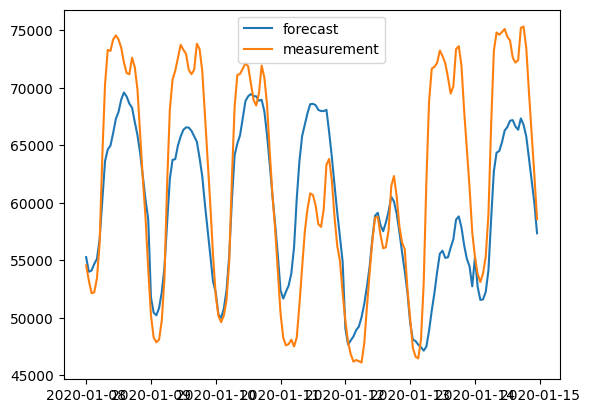

In [8]:
plt.plot(predictions)
plt.plot(test)
plt.legend(["forecast", "measurement"])

# Generation type forecasting

## Read in generation data

In [9]:
data_gen = pd.DataFrame()
data_gen = pd.read_csv("./data/entsoe_gen.csv",
                   header=[0],
                   index_col=0,
                   decimal=",",
                   low_memory=False,
                  ).drop(
    ['Fossil Gas.1',
     'Fossil Oil.1',
     'Hydro Water Reservoir.1',
     'Nuclear.1',
     'Other renewable.1',
     'Solar.1',
     'Wind Onshore.1'],
    axis=1,
)

data_gen.drop(index=data_gen.index[0], axis=0, inplace=True)

data_gen.index = pd.to_datetime(data_gen.index,
                                    utc=True
                                    ).tz_convert(tz="Europe/Berlin")

In [10]:
data_gen = data_gen.astype(float)

In [11]:
data_gen = data_gen["2020-01-01":"2020-01-31"].resample("1H").mean()

## Make generation prediction of all different generation types

In [12]:
Predictions = pd.DataFrame()
MAPE = pd.DataFrame()
MAE = pd.DataFrame()
RMSE = pd.DataFrame()
Observed = pd.DataFrame()

for col in data_gen.columns:
    predictions = pd.DataFrame()
    mape_ = []
    rmse_ = []
    mae_ = []

    train = data_gen[col]["2020-01-01":"2020-01-07"]
    test = data_gen[col]["2020-01-08":"2020-01-10"]

    # iterate through the test dataset,day by day
    for i in range(0, len(test),24):
        start = test.index[i]
        end = test.index[i+23]

        # train the model order=(AR,I,MA)
        model = ARIMA(train, order=(24,1,24))

        # fit the model
        model_fit = model.fit()

        # make prediction from start to end index
        forecast = model_fit.predict(start, end)

        # add predictions to result dataframe
        predictions = pd.concat([predictions, forecast], axis=0)

        # observed data for the prediction period
        obs = test[start:end]

        # add oberserved data to the training set for training before the next prediction period
        train = pd.concat([train, obs], axis=0)

        # evaluate forecasts
        mae = sqrt(mean_absolute_error(obs, forecast))
        print('Test MAE: %.3f' % mae)
        mae_.append(mae)

        rmse = sqrt(mean_squared_error(obs, forecast))
        print('Test RMSE: %.3f' % rmse)
        rmse_.append(rmse)

        mape = mean_absolute_percentage_error(obs, forecast)
        print('Test MAPE: %.3f' % mape)
        mape_.append(mape)
    
    Predictions[col] = predictions
    Observed[col] = test
    MAPE[col] = mape_
    MAE[col] = mae_
    RMSE[col] = rmse_


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 7.450
Test RMSE: 74.241
Test MAPE: 0.011


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 7.623
Test RMSE: 70.316
Test MAPE: 0.012


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 5.687
Test RMSE: 41.269
Test MAPE: 0.006


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 49.202
Test RMSE: 2508.652
Test MAPE: 0.220


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 26.956
Test RMSE: 839.450
Test MAPE: 0.064


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 33.331
Test RMSE: 1257.758
Test MAPE: 0.096


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 43.747
Test RMSE: 2326.681
Test MAPE: 0.227


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 46.874
Test RMSE: 2543.136
Test MAPE: 0.297


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 31.575
Test RMSE: 1130.149
Test MAPE: 0.132


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 41.986
Test RMSE: 2216.046
Test MAPE: 0.208


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 55.344
Test RMSE: 3627.675
Test MAPE: 0.514


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 26.145
Test RMSE: 811.782
Test MAPE: 0.118


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 5.892
Test RMSE: 65.835
Test MAPE: 0.071


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 6.103
Test RMSE: 40.903
Test MAPE: 0.079


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.352
Test RMSE: 12.604
Test MAPE: 0.024


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 0.949
Test RMSE: 1.005
Test MAPE: 0.036


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 1.621
Test RMSE: 3.493
Test MAPE: 0.125


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 1.342
Test RMSE: 2.115
Test MAPE: 0.074


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 24.617
Test RMSE: 787.760
Test MAPE: 0.543


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 26.034
Test RMSE: 789.507
Test MAPE: 5.684


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 24.138
Test RMSE: 698.547
Test MAPE: 1.246


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 34.371
Test RMSE: 1480.044
Test MAPE: 9.689


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 29.516
Test RMSE: 1077.351
Test MAPE: 1.829


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 29.785
Test RMSE: 1062.153
Test MAPE: 1.277


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 9.171
Test RMSE: 93.284
Test MAPE: 0.061


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 5.881
Test RMSE: 40.907
Test MAPE: 0.025


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 6.878
Test RMSE: 52.455
Test MAPE: 0.035


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 5.992
Test RMSE: 44.365
Test MAPE: 0.585


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 5.982
Test RMSE: 40.327
Test MAPE: 1.552


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 6.643
Test RMSE: 56.007
Test MAPE: 0.826


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 9.322
Test RMSE: 104.907
Test MAPE: 0.011


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 10.318
Test RMSE: 115.281
Test MAPE: 0.013


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 19.406
Test RMSE: 499.481
Test MAPE: 0.050


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.508
Test RMSE: 17.950
Test MAPE: 0.031


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 4.499
Test RMSE: 22.140
Test MAPE: 0.048


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 4.078
Test RMSE: 22.164
Test MAPE: 0.043


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 2.283
Test RMSE: 7.434
Test MAPE: 0.029


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 2.285
Test RMSE: 6.582
Test MAPE: 0.029


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.329
Test RMSE: 13.920
Test MAPE: 0.064


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 34.243
Test RMSE: 1326.019
Test MAPE: 2637917027168825344.000


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 25.694
Test RMSE: 1214.031
Test MAPE: 318802371399072256.000


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 21.725
Test RMSE: 617.112
Test MAPE: 819583395353839232.000


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.893
Test RMSE: 18.096
Test MAPE: 0.018


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.845
Test RMSE: 19.264
Test MAPE: 0.018


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 3.557
Test RMSE: 17.400
Test MAPE: 0.016


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 40.122
Test RMSE: 1955.646
Test MAPE: 0.615


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 49.145
Test RMSE: 2800.814
Test MAPE: 1.013


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 47.044
Test RMSE: 2960.865
Test MAPE: 0.492


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 80.351
Test RMSE: 8326.512
Test MAPE: 0.519


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 103.902
Test RMSE: 12160.722
Test MAPE: 0.547


C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\envs\Merrit_Order\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAE: 38.031
Test RMSE: 1729.877
Test MAPE: 0.067


# Plot results for all diffenrent generation types 

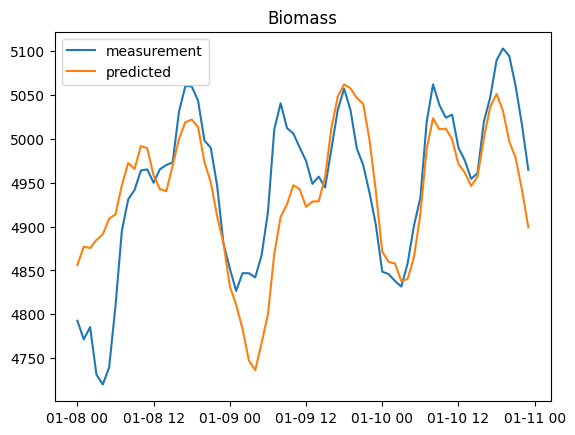

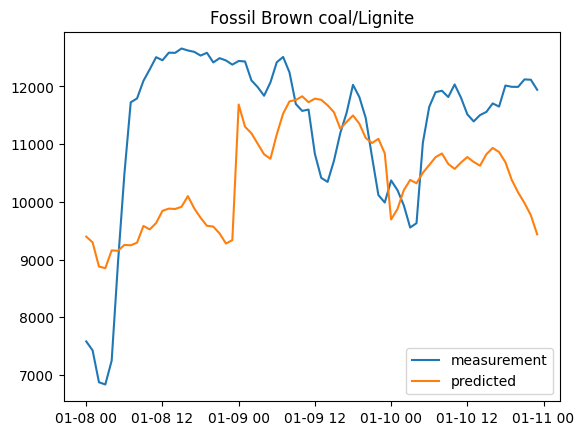

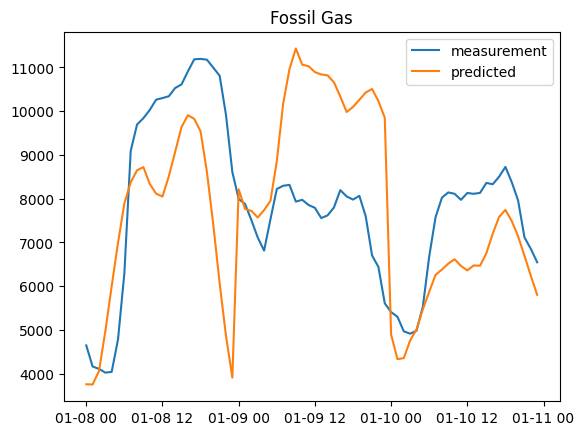

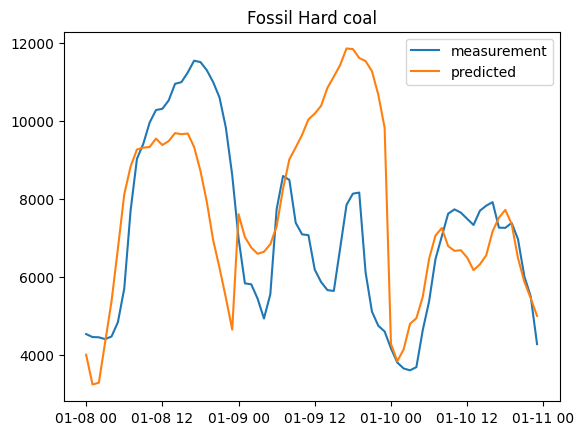

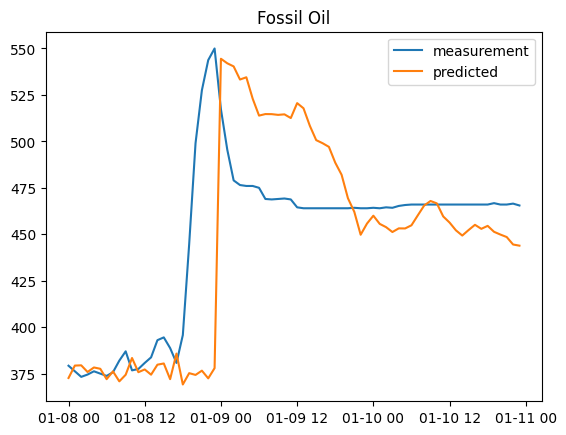

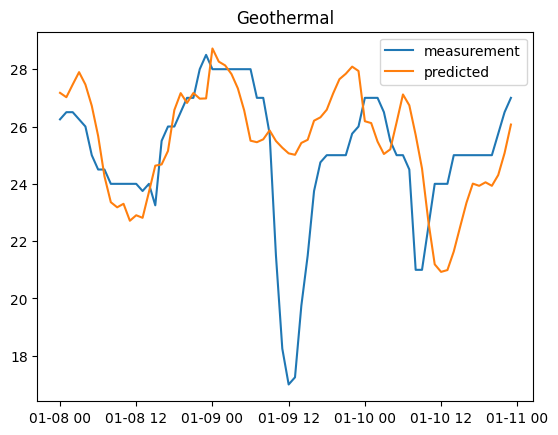

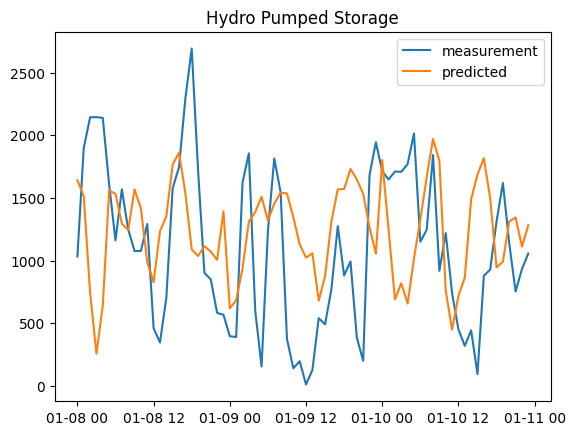

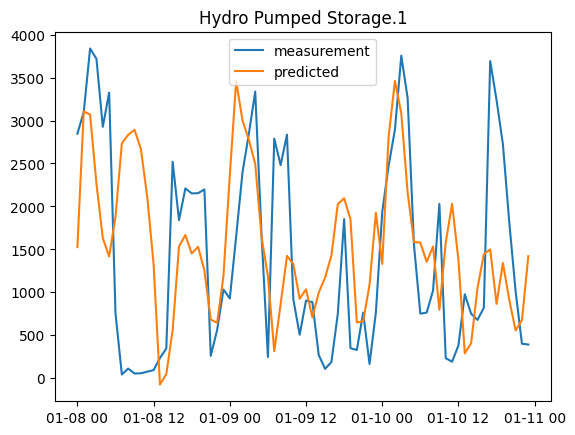

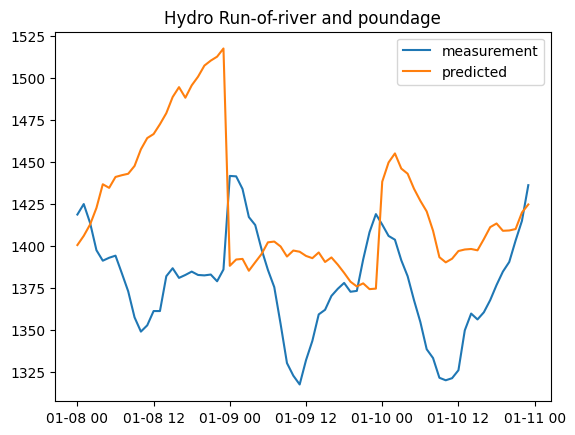

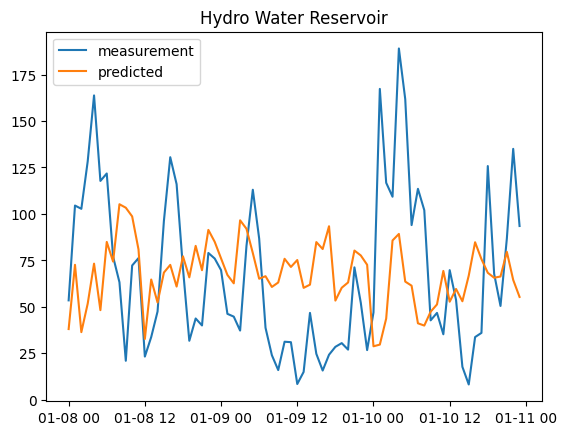

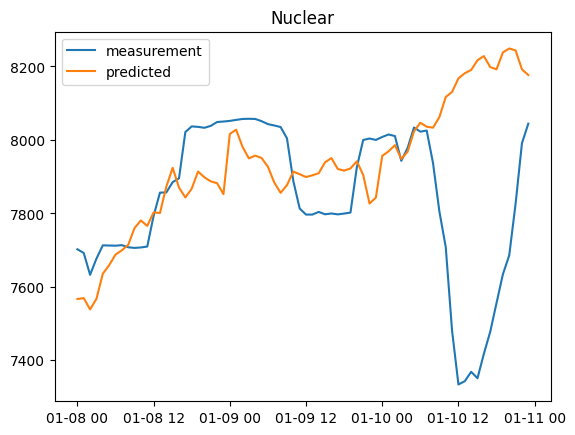

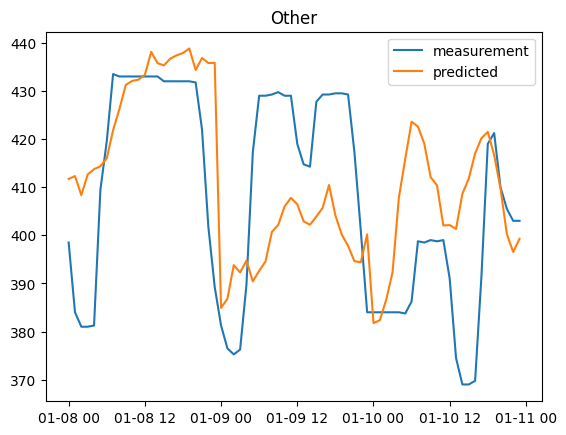

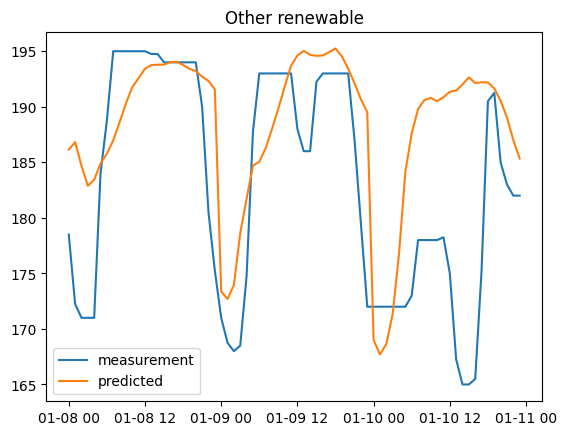

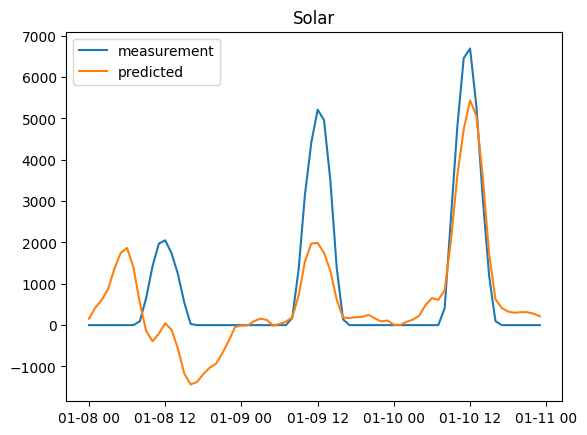

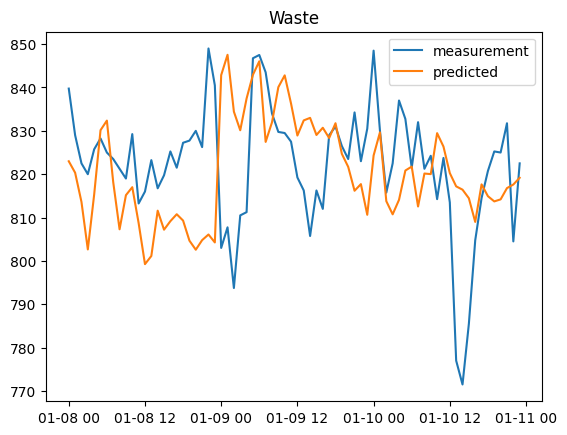

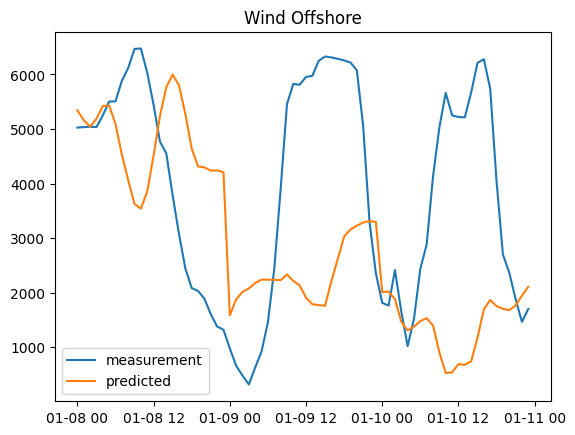

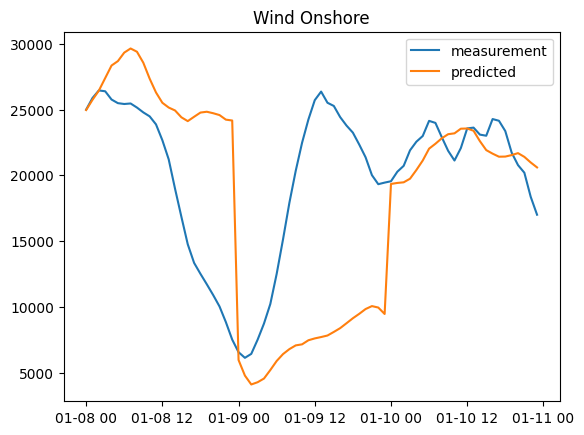

In [13]:
for col in Predictions.columns:
    plt.plot(Observed[col])
    plt.plot(Predictions[col])
    plt.legend(["measurement", "predicted"])
    plt.title(col)
    plt.show()